**Our aim here is to conduct a wide variety of analyzes and forecasting operations using the data set here.**
**The dataset contains several parameters which are considered important during the application for Masters Programs**

**The parameters included are :**

    - GRE Scores ( out of 340 )
    - TOEFL Scores ( out of 120 )
    - University Rating ( out of 5 )
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
    - Undergraduate GPA ( out of 10 )
    - Research Experience ( either 0 or 1 )
    - Chance of Admit ( ranging from 0 to 1 )

Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions/home

In [64]:
#Importing the Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor, l, LogisticRegression, SGDRegressor
from xgboost import XGBRegressor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, accuracy_score


In [67]:
#Importing dataset

data = pd.read_csv(r'C:\Users\akjaiswal\Desktop\ML\Projects\07. Graduate Admissions\Data.csv')

In [4]:
#Understanding the data

data.head(7)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [9]:
data.shape

(500, 9)

In [11]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [68]:
#Dropping irrelevant columns

data = data.drop(['Serial No.'], axis = 1)

In [15]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


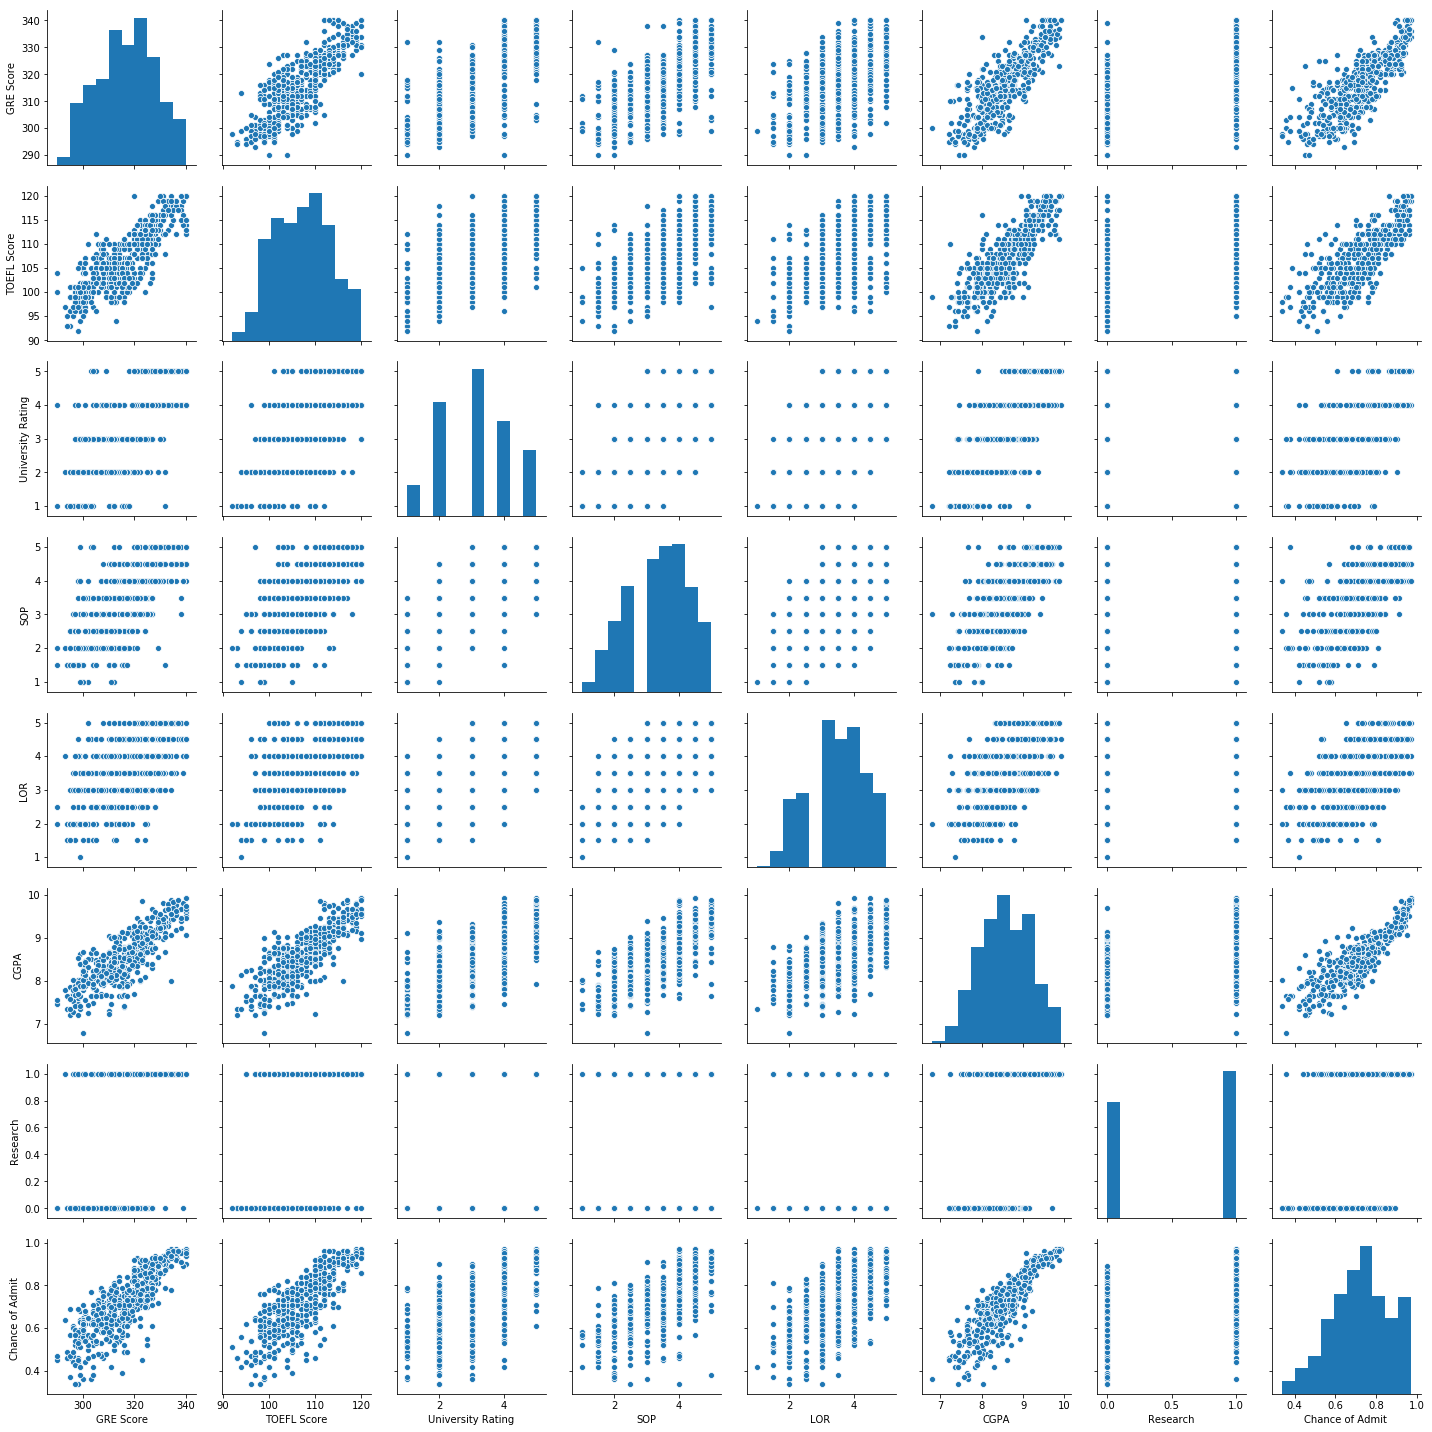

In [16]:
#Observing the relationship between the variables

sns.pairplot(data)
plt.show()

**We can observe there is a linear relationship between GRE Score and TOEFL Score , GRE Score , TOEFL Score with CGPA** 

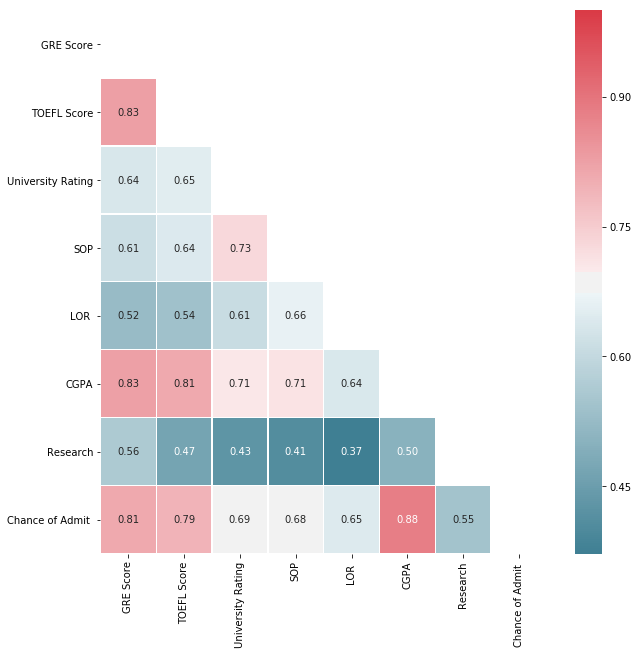

In [17]:
#Observing the relationship between Columns

corr = data.corr()

fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()


**Columns with High Correlation value :**
    
    - CGPA
    - GRE
    - TOEFL
    - University Ranking
    

**Univariate Analysis**

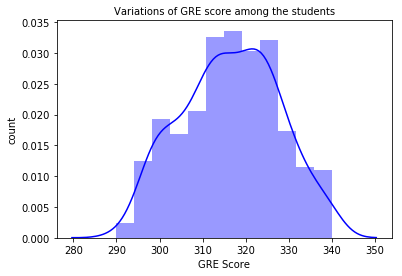

In [38]:
sns.distplot(data['GRE Score'], color = 'blue')
plt.title('Variations of GRE score among the students', fontsize = 10)
plt.xlabel('GRE Score')
plt.ylabel('count')
plt.show()


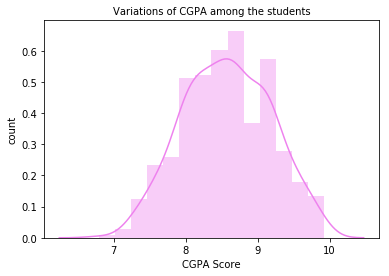

In [34]:
sns.distplot(data['CGPA'], color = 'violet')
plt.title('Variations of CGPA among the students', fontsize = 10)
plt.xlabel('CGPA Score')
plt.ylabel('count')
plt.show()

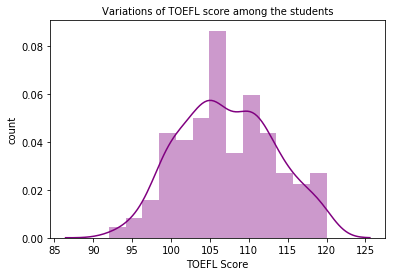

In [35]:
sns.distplot(data['TOEFL Score'], color = 'purple')
plt.title('Variations of TOEFL score among the students', fontsize = 10)
plt.xlabel('TOEFL Score')
plt.ylabel('count')
plt.show()

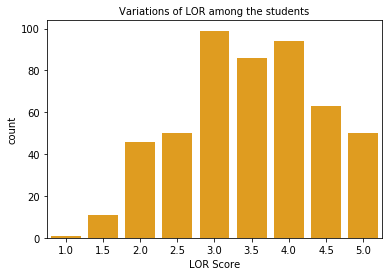

In [36]:
sns.countplot(data['LOR '], color = 'orange')
plt.title('Variations of LOR among the students', fontsize = 10)
plt.xlabel('LOR Score')
plt.ylabel('count')
plt.show()

**Multivariate Analysis**

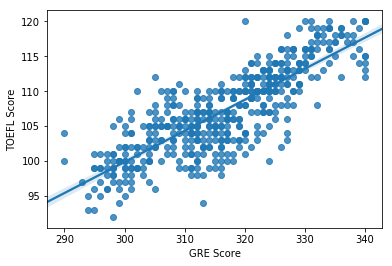

In [40]:
fig = sns.regplot(x = "GRE Score", y = "TOEFL Score", data = data)
plt.show()

People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable.

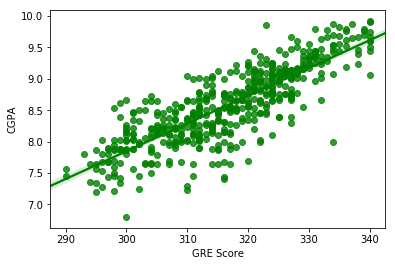

In [43]:
fig = sns.regplot(x = "GRE Score", y = "CGPA", data = data, color = 'green')
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working.


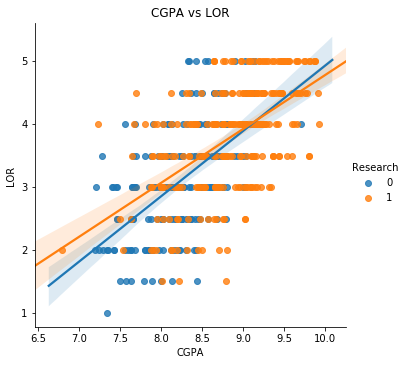

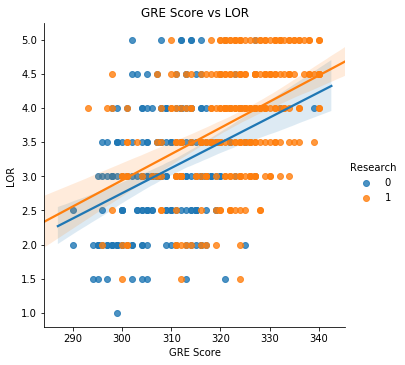

In [47]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=data, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

fig = sns.lmplot(x="GRE Score", y="LOR ", data=data, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

    - LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. 

    - GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores


In [69]:
X = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [70]:
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

DecisionTree : 0.091087869664407
Linear Regression : 0.04293220746251859
RandomForest : 0.05111472586251439
KNeighbours : 0.06980687645210894
SVM : 0.07329997552068902
AdaBoostClassifier : 0.055491714975269994
GradientBoostingClassifier:  0.04781836385667449
Xgboost:  0.047847203973177606
Lasso:  0.11488570174881235
Ridge:  0.0428940011835737
BayesianRidge:  0.0428968053533
ElasticNet:  0.08739127414117272
HuberRegressor:  0.0575593261147582


**Most of the models are underperforming as we have not scaled the data**



In [71]:
# splitting the data into dependent and independent datasets

xS = data.iloc[:, :-1]
yS = data.iloc[:, -1]

# getting the shapes of x and y
print("Shape of x: ", xS.shape)
print("Shape of y: ", yS.shape)

Shape of x:  (500, 7)
Shape of y:  (500,)


In [73]:
# splitting into train and test

from sklearn.model_selection import train_test_split

xS_train, xS_test, yS_train, yS_test = train_test_split(xS, yS, test_size = 0.3, random_state = 0)

print("Shape of xS_train :", xS_train.shape)
print("Shape of xS_test :", xS_test.shape)
print("Shape of yS_train :", yS_train.shape)
print("Shape of yS_test :", yS_test.shape)

Shape of xS_train : (350, 7)
Shape of xS_test : (150, 7)
Shape of yS_train : (350,)
Shape of yS_test : (150,)


In [75]:
# standard Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xS_train = sc.fit_transform(xS_train)
xS_test = sc.transform(xS_test)

In [80]:
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]


for name,model in models:
    model = model
    model.fit(xS_train, yS_train)
    predictions = model.predict(xS_test)
    print(name, (np.sqrt(mean_squared_error(yS_test, predictions))))



DecisionTree : 0.08533854150773065
Linear Regression : 0.061748271935172815
RandomForest : 0.06569129419743022
KNeighbours : 0.07687652437513028
SVM : 0.07610287395909045
AdaBoostClassifier : 0.06893703368045369
GradientBoostingClassifier:  0.06468860787310883
Xgboost:  0.06560616278552077
Lasso:  0.1367055348744378
Ridge:  0.061734856981973334
BayesianRidge:  0.06170849557650826
ElasticNet:  0.1367055348744378
HuberRegressor:  0.06123363310659893


**We can see the change because of columsn scaling**

**Linear Regression produces lowest RMSE value which defines less dispersion**